**Advanced Data Science Capstone Project: Prediction of the cardiovascular events.**


Link to the Github, where you can find:
1. Architectual Dicision Document (.pdf)
2. Project Presentation - Prediction of cardiovascular events (.pptx)
3. Link to this Notebook with code

Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 

**Use Case identification:** find any trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.
_________________________________________________________________________________________

Data Source: https://www.kaggle.com/ronitf/heart-disease-uci (Initial Data Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

Data Context: 
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Data Attribute Information:
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory. To see Test Costs (donated by Peter Turney), please see the folder "Costs"

Dataset Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


The objectives of ETL (Extract Transform Load):
1. To get an overview of the distribution of the dataset.
2. Check for missing numerical values, outliers or other anomalies in the dataset.
3. Discover patterns and relationships between variables in the dataset.
4. Check the underlying assumptions in the dataset.

In [1]:
# Import libraries 

import sys
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
import types
from botocore.client import Config
import ibm_boto3

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# models
import sklearn
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Using TensorFlow backend.


Python: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]
Pandas: 0.24.1
Numpy: 1.15.4
Sklearn: 0.20.3
Matplotlib: 3.0.2
Keras: 2.2.4


In [2]:
# Accesses file with dataset in my IBM Cloud Object Storage.
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e2e58d4258df4dfaa2da2d0236490674 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2os3hsOadGphHhcyPE3jTVcV80GQfGL_d1yUIw9sMr5p',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_e2e58d4258df4dfaa2da2d0236490674.get_object(Bucket='default-donotdelete-pr-6vclcjocqkqbbp',Key='heart.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Data quality check

In [4]:
# check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#assert that there are no missing values in the dataframe
assert pd.notnull(df).all().all()

In [6]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
# statistical properties of dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# View column names 
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
# Let's study "target"

In [10]:
# Check the number of unique values in target variable
df['target'].nunique()

2

In [11]:
# Check the unique values in target variable
df['target'].unique()

array([1, 0])

In [12]:
# Caunt the unique values in target variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
# Check the distribution of the unique values in target variable
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

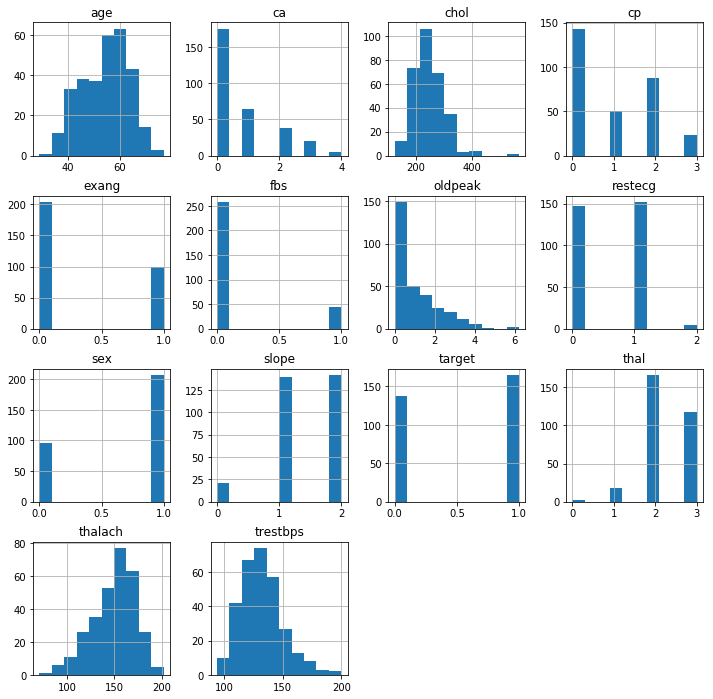

In [14]:
df.hist(figsize = (12, 12))
plt.show()

Text(0.5, 1.0, 'thal vs Target ')

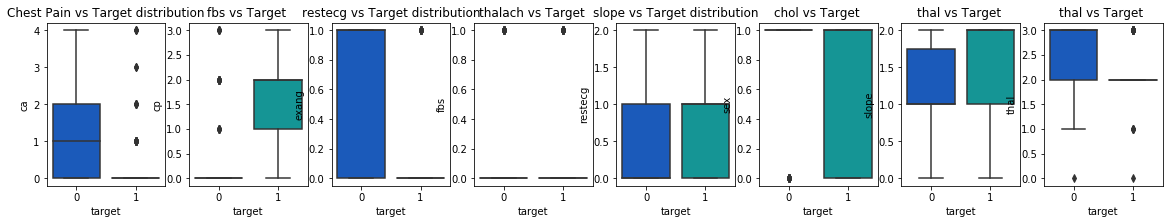

In [15]:
# Taking all descreate values for sepearate analysis
fig, axes = plt.subplots(ncols=8,figsize=(20,3))
sns.boxplot(x='target',y='ca',data=df, palette='winter', ax=axes[0])
axes[0].set_title('Chest Pain vs Target distribution')

sns.boxplot(x='target',y='cp' ,data=df, palette='winter', ax=axes[1])
axes[1].set_title("fbs vs Target ")

sns.boxplot(x='target',y='exang' ,data=df, palette='winter', ax=axes[2])
axes[2].set_title("restecg vs Target distribution")

sns.boxplot(x='target',y='fbs' ,data=df, palette='winter', ax=axes[3])
axes[3].set_title("thalach vs Target ")

sns.boxplot(x='target',y='restecg' ,data=df, palette='winter', ax=axes[4])
axes[4].set_title("slope vs Target distribution")

sns.boxplot(x='target',y='sex' ,data=df, palette='winter', ax=axes[5])
axes[5].set_title("chol vs Target ")

sns.boxplot(x='target',y='slope' ,data=df, palette='winter', ax=axes[6])
axes[6].set_title("thal vs Target ")

sns.boxplot(x='target',y='thal' ,data=df, palette='winter', ax=axes[7])
axes[7].set_title("thal vs Target ")

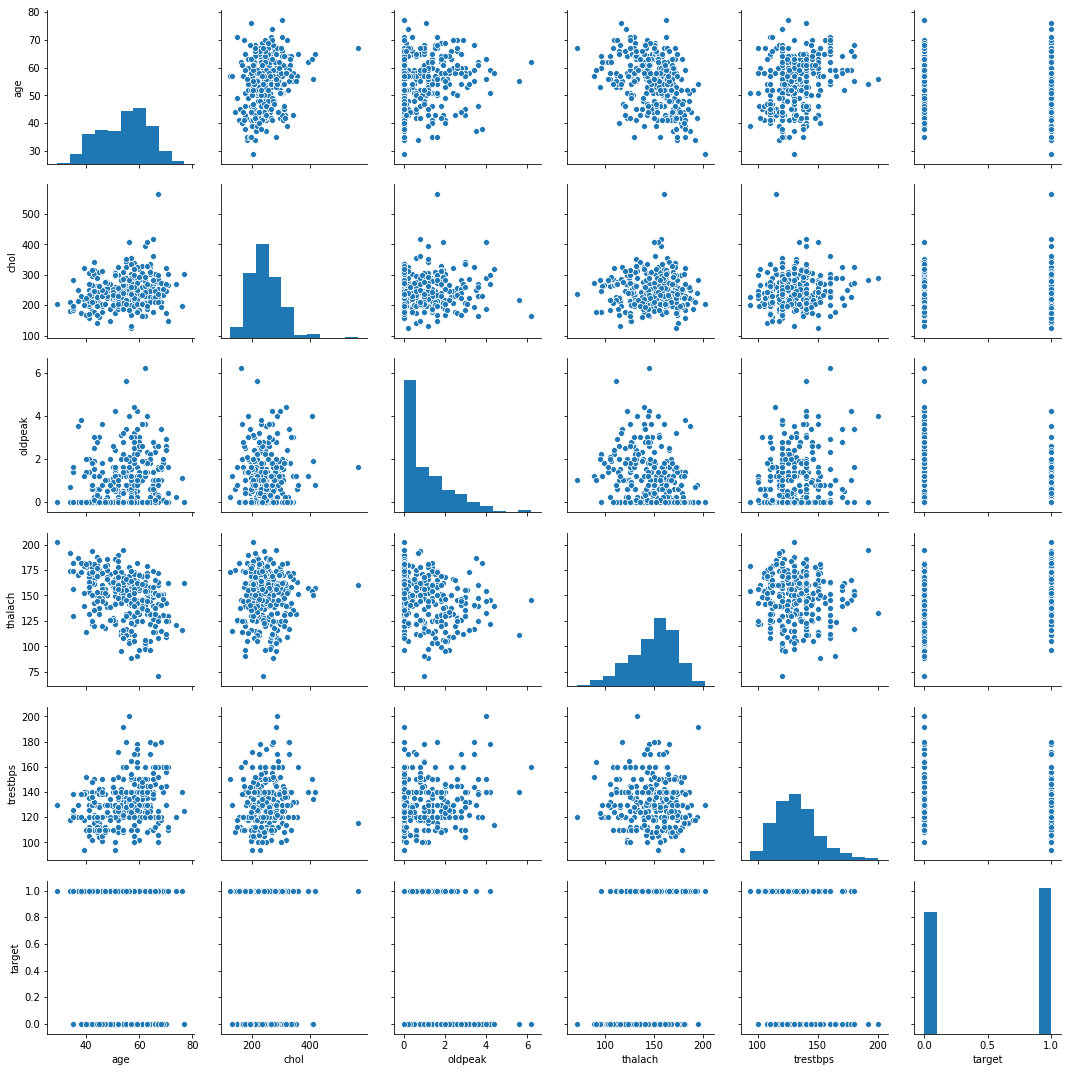

In [16]:
rest_data = ['age', 'chol', 'oldpeak', 'thalach', 'trestbps', 'target' ]
sns.pairplot(df[rest_data], kind='scatter', diag_kind='hist')
plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


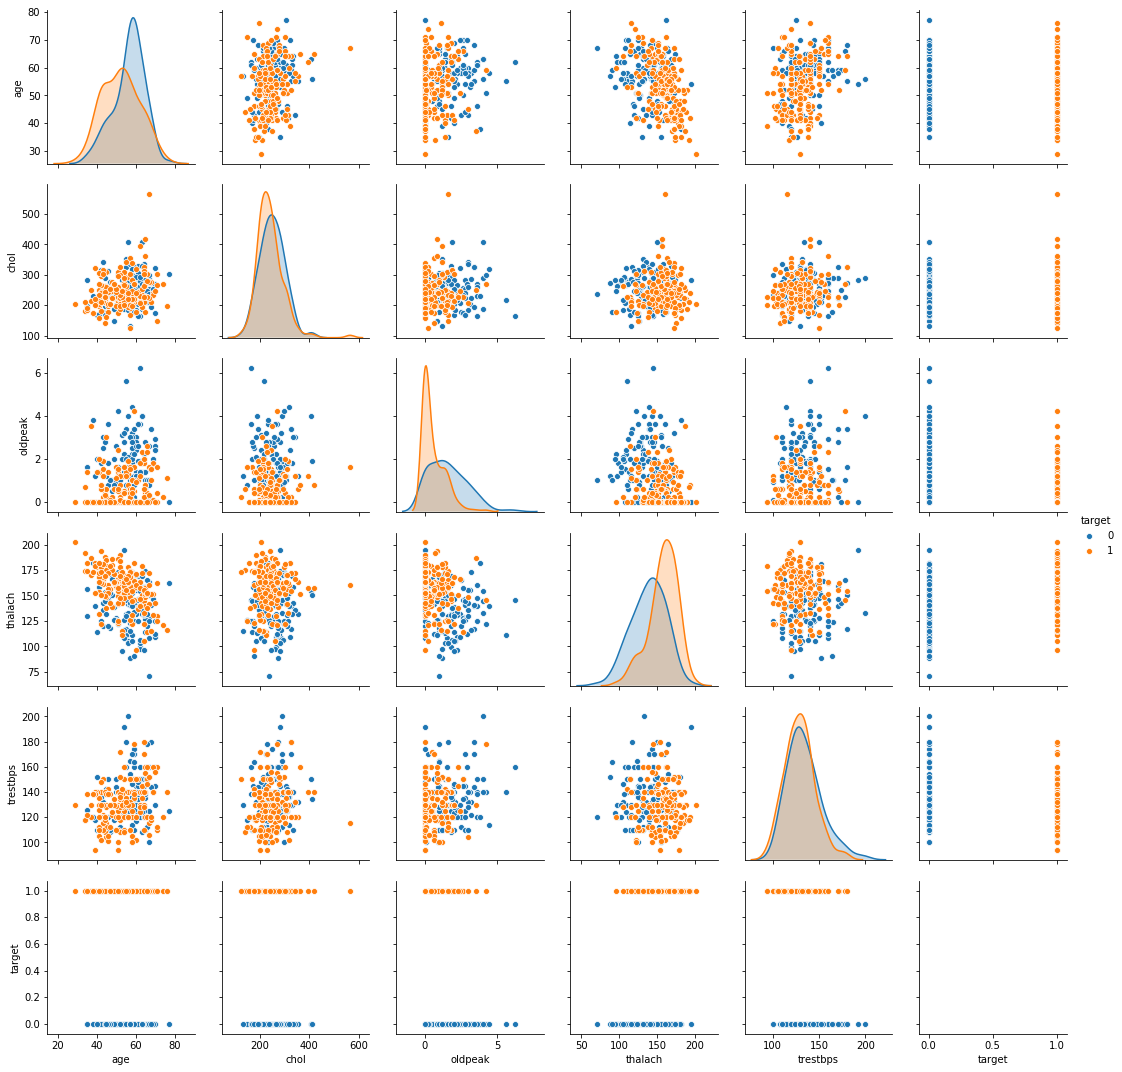

In [17]:
rest_data_vs_target = df[rest_data]
sns.pairplot(rest_data_vs_target, hue="target")

In [18]:
# Checking correlation between target variable and each attributes
correlation = df.corr()
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

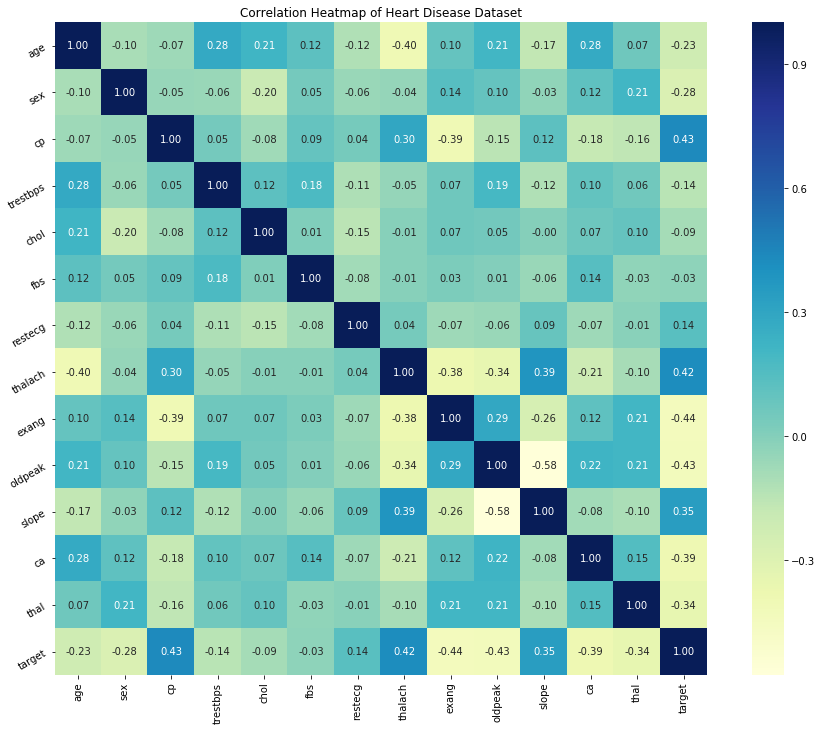

In [19]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, cmap='YlGnBu', square=True, annot=True, fmt='.2f', linecolor='green')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()


**Let's Start train and test different models:**

In [20]:
target_name = 'target'
data_target = df[target_name]
data = df.drop([target_name], axis=1)

In [21]:
# I split data on 20% in the test dataset, the remaining 80% - in the training dataset

train, test, target, target_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [22]:
train.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2


In [23]:
test.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 74 to 172
Data columns (total 13 columns):
age         242 non-null int64
sex         242 non-null int64
cp          242 non-null int64
trestbps    242 non-null int64
chol        242 non-null int64
fbs         242 non-null int64
restecg     242 non-null int64
thalach     242 non-null int64
exang       242 non-null int64
oldpeak     242 non-null float64
slope       242 non-null int64
ca          242 non-null int64
thal        242 non-null int64
dtypes: float64(1), int64(12)
memory usage: 26.5 KB


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 225 to 89
Data columns (total 13 columns):
age         61 non-null int64
sex         61 non-null int64
cp          61 non-null int64
trestbps    61 non-null int64
chol        61 non-null int64
fbs         61 non-null int64
restecg     61 non-null int64
thalach     61 non-null int64
exang       61 non-null int64
oldpeak     61 non-null float64
slope       61 non-null int64
ca          61 non-null int64
thal        61 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.7 KB


In [26]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

84.71

In [27]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

85.25

In [28]:
# Support Vector Machines 

svc = SVC()
svc.fit(train, target)
acc_svc = round(svc.score(train, target)*100, 2)
acc_svc

100.0

In [29]:
acc_test_svc = round(svc.score(test, target_test) * 100, 2)
acc_test_svc

59.02

In [30]:
# Linear Support Vector Machines (SVC)

linear_svc = LinearSVC(dual=False)  # dual=False when n_samples > n_features.
linear_svc.fit(train, target)
acc_linear_svc = round(linear_svc.score(train, target) * 100, 2)
acc_linear_svc

84.3

In [31]:
acc_test_linear_svc = round(linear_svc.score(test, target_test) * 100, 2)
acc_test_linear_svc

83.61

In [32]:
# k-Nearest Neighbors algorithm (KNN)

knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(train, target)
acc_knn = round(knn.score(train, target) * 100, 2)
print(acc_knn, knn.best_params_)

78.1 {'n_neighbors': 3}


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
acc_test_knn = round(knn.score(test, target_test) * 100, 2)
acc_test_knn

63.93

In [34]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

83.47

In [35]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

85.25

In [36]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, target)
acc_perceptron = round(perceptron.score(train, target) * 100, 2)
acc_perceptron

67.77

In [37]:
acc_test_perceptron = round(perceptron.score(test, target_test) * 100, 2)
acc_test_perceptron

70.49

In [38]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, target)
acc_sgd = round(sgd.score(train, target) * 100, 2)
acc_sgd

63.22

In [39]:
acc_test_sgd = round(perceptron.score(test, target_test) * 100, 2)
acc_test_sgd

70.49

In [40]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

100.0

In [41]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

77.05

In [42]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


100.0 {'n_estimators': 300}


In [43]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

83.61

In [44]:
# Ridge Classifier

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(train, target)
acc_ridge_classifier = round(ridge_classifier.score(train, target) * 100, 2)
acc_ridge_classifier

83.47

In [45]:
acc_test_ridge_classifier = round(ridge_classifier.score(test, target_test) * 100, 2)
acc_test_ridge_classifier

83.61

In [46]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'k-Nearest Neighbors', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Decision Tree Classifier', 'Random Forest', 
              'RidgeClassifier'],
    
    'Score_train': [acc_log, acc_svc, acc_linear_svc, 
                    acc_knn, acc_gaussian, acc_perceptron, 
                    acc_sgd, acc_decision_tree, acc_random_forest, 
                    acc_ridge_classifier],
    
    'Score_test': [acc_test_log, acc_test_svc, acc_test_linear_svc, 
                   acc_test_knn, acc_test_gaussian, acc_test_perceptron, 
                   acc_test_sgd, acc_test_decision_tree, acc_test_random_forest, 
                   acc_test_ridge_classifier]
                    })

In [47]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
8,Random Forest,100.00,83.61
7,Decision Tree Classifier,100.00,77.05
1,Support Vector Machines,100.00,59.02
0,Logistic Regression,84.71,85.25
2,Linear SVC,84.30,83.61
4,Naive Bayes,83.47,85.25
9,RidgeClassifier,83.47,83.61
3,k-Nearest Neighbors,78.10,63.93
5,Perceptron,67.77,70.49
6,Stochastic Gradient Decent,63.22,70.49


In [48]:
models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

,Model,Score_train,Score_test
0,Logistic Regression,84.71,85.25
4,Naive Bayes,83.47,85.25
8,Random Forest,100.00,83.61
2,Linear SVC,84.30,83.61
9,RidgeClassifier,83.47,83.61
7,Decision Tree Classifier,100.00,77.05
5,Perceptron,67.77,70.49
6,Stochastic Gradient Decent,63.22,70.49
3,k-Nearest Neighbors,78.10,63.93
1,Support Vector Machines,100.00,59.02


**Time to build Keras Neural networks**

In [50]:
# create X and Y datasets for training
from sklearn import model_selection
X = np.array(df.drop(['target'], 1))
y = np.array(df['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [51]:
# convert the data to categorical labels

from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [52]:
# Building and Training the Neural Network

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=200, batch_size=10, verbose = 10)

Instructions for updating:
Use tf.cast instead.
Train on 242 samples, validate on 61 samples
Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 

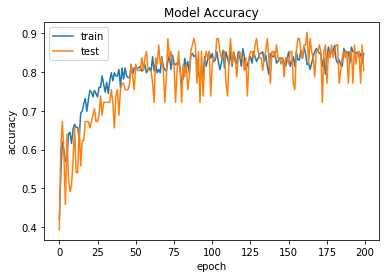

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

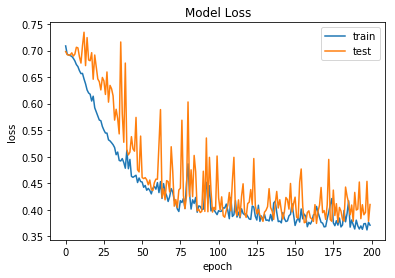

In [55]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [56]:
# Improving Results - A Binary Classification Problem
# Although we achieved promising results, we still have a fairly large error. 
#This could be because it is very difficult to distinguish between the different severity levels of heart disease (classes 1 - 4). 
#Let's simplify the problem by converting the data to a binary classification problem - heart disease or no heart disease.


In [57]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0]


In [58]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=200, batch_size=10, verbose = 10)

Train on 242 samples, validate on 61 samples
Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Ep

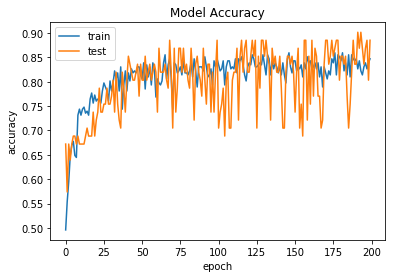

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

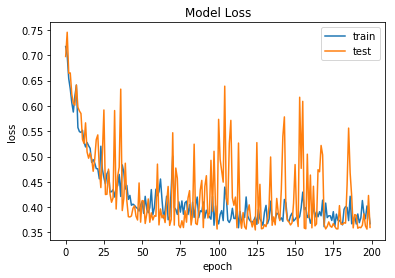

In [61]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [62]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.8032786885245902
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        24
           1       0.90      0.76      0.82        37

   micro avg       0.80      0.80      0.80        61
   macro avg       0.80      0.82      0.80        61
weighted avg       0.82      0.80      0.81        61



In [63]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8852459016393442
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.89      0.92      0.91        37

   micro avg       0.89      0.89      0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61



Postscript:

 This work has been created based on the studies of the  following contributors and data scientists:\
https://www.kaggle.com/prashant111/extensive-eda-visualization-with-python

https://www.kaggle.com/faressayah/heart-disease-eda-9-ml-algorithms-90

https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model#The-Model

https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning

https://www.kaggle.com/vbmokin/heart-disease-comparison-of-20-models

https://www.kaggle.com/rahul197/heart-disease-classification-machine-learning

https://www.kaggle.com/mytymohan/heart-disease-eda-lr-dt-rf-gb-svm-dl

https://towardsdatascience.com/machine-learning-for-diabetes-562dd7df4d42

https://towardsdatascience.com/machine-learning-for-diabetes-562dd7df4d42

Thanks to every one! It was really helpfull! 